In [36]:
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv('D:/Python_Projects/Regression/buyornot.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
# Features overview
data.Age.value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

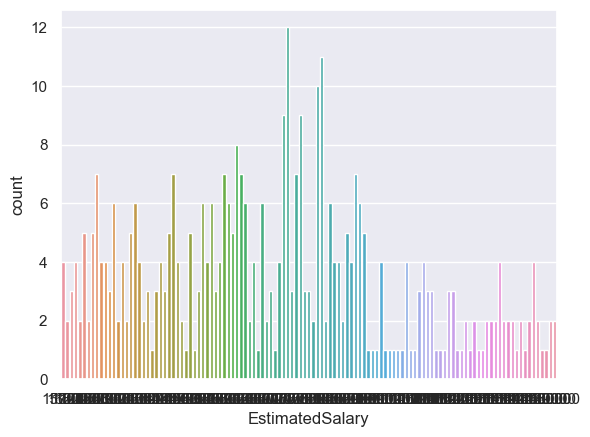

In [40]:
import matplotlib.pyplot as plt

sns.countplot(x="EstimatedSalary", data=data)
plt.show()

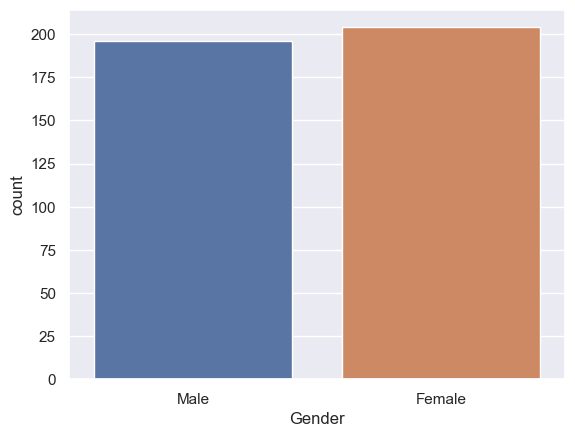

In [41]:
sns.countplot(x="Gender", data=data)
plt.show()

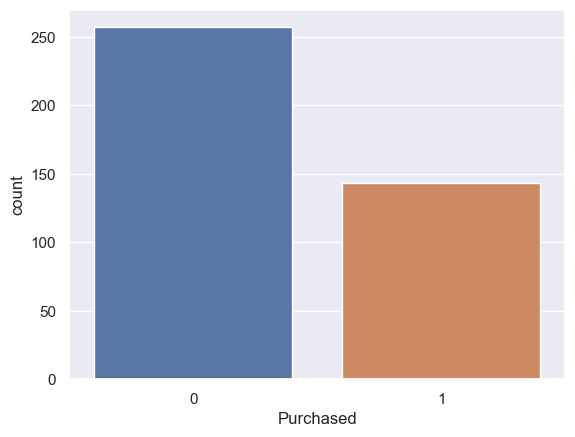

In [42]:
# Целевая переменная

sns.countplot(x="Purchased", data=data)
plt.show()

In [43]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot: xlabel='EstimatedSalary', ylabel='Count'>

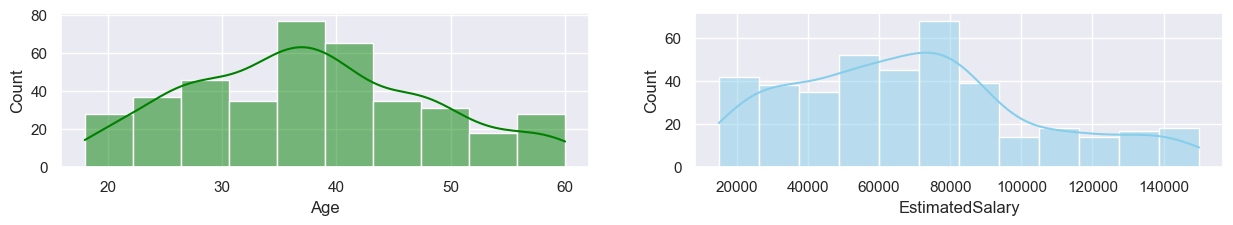

In [44]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 2))

sns.histplot(data=data, x="Age", kde=True, ax=axs[0], color='green')
sns.histplot(data=data, x="EstimatedSalary", kde=True, ax=axs[1], color='skyblue')

C:\Users\sneda\AppData\Local\Temp\ipykernel_12244\1259163109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


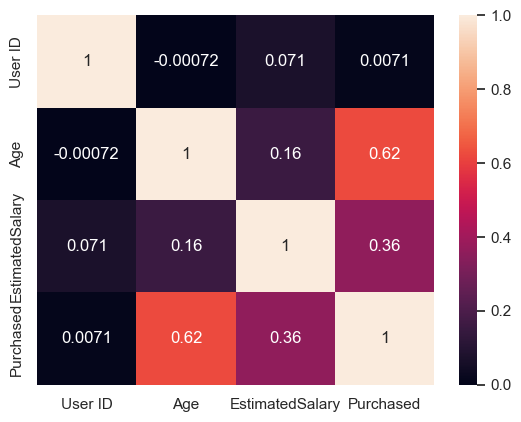

In [45]:
sns.heatmap(data.corr(), annot=True);

In [46]:
# Dataset collection
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [47]:
data = data.drop(['User ID'], axis = 1)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [55]:
from imblearn.over_sampling import SMOTE

X = data.drop(["Purchased", "Gender"], axis=1)
y = data["Purchased"]

X, y = SMOTE().fit_resample(X, y)

In [56]:
# Data Normalization (more or less)
X.Age = np.sqrt(X.Age)
X.EstimatedSalary = np.sqrt(X.EstimatedSalary)

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Count'>

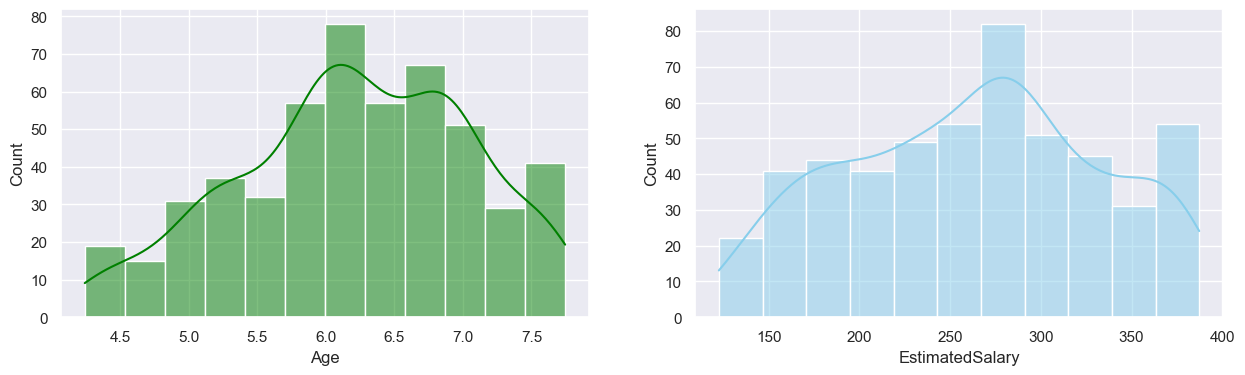

In [57]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=X, x="Age", kde=True, ax=axs[0], color='green')
sns.histplot(data=X, x="EstimatedSalary", kde=True, ax=axs[1], color='skyblue')

In [58]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

data = pd.read_csv('D:/Python_Projects/Regression/buyornot.csv')

X = data.drop(["Purchased", "Gender"], axis=1)
y = data["Purchased"]

X, y = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


model = LogisticRegression(max_iter=500, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(mean_squared_error(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        47
           1       0.69      0.64      0.67        56

    accuracy                           0.65       103
   macro avg       0.65      0.65      0.65       103
weighted avg       0.65      0.65      0.65       103

0.34951456310679613


<AxesSubplot: >

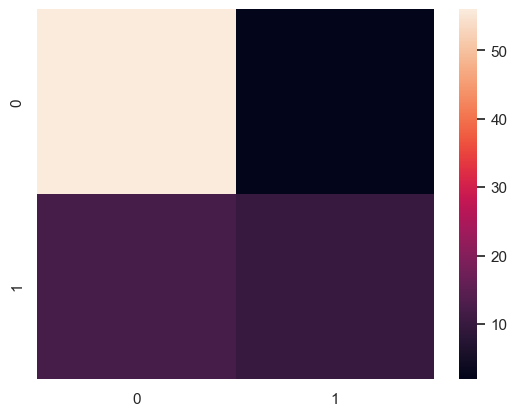

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred))